# This notebook demonstrates the class distribution of the utilized Fake/True News datasets

In [4]:
import os
import glob
import pandas
import matplotlib.pyplot as plt
import numpy as np
from transformers import squad_convert_examples_to_features
from common import *
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import IncrementalPCA, PCA
import tarfile


In [5]:
SAMPLE_SIZE = 3000
COMPONENTS = 2

# Preprocess Data

In [6]:
if not os.path.exists('aclImdb'):
    if not os.path.exists('aclImdb_v1.tar.gz'):
        files = download_data()
    else:
        files = ['aclImdb_v1.tar.gz']
    
    tarfile.open(files[0]).extractall()

paths = glob.glob('aclImdb/**/pos/*.txt', recursive=True)
pos_frame = get_data(paths, 1)
paths = glob.glob('aclImdb/**/neg/*.txt', recursive=True)
neg_frame = get_data(paths, 0)

dataset = pd.concat([pos_frame, neg_frame])

# PCA: Plot for TF-IDF and BoW vectorizer

In [7]:
tfidf_vectorizer = TfidfVectorizer()
analyzer = PCA(n_components=COMPONENTS)

Iteration: 1
TF-IDF matrix shape: (3000, 30729)
PCA matrix shape: (3000, 2)
Iteration: 2
TF-IDF matrix shape: (3000, 31048)
PCA matrix shape: (3000, 2)
Iteration: 3
TF-IDF matrix shape: (3000, 30646)
PCA matrix shape: (3000, 2)
Iteration: 4
TF-IDF matrix shape: (3000, 30622)
PCA matrix shape: (3000, 2)
Iteration: 5
TF-IDF matrix shape: (3000, 31098)
PCA matrix shape: (3000, 2)
Iteration: 6
TF-IDF matrix shape: (3000, 30727)
PCA matrix shape: (3000, 2)


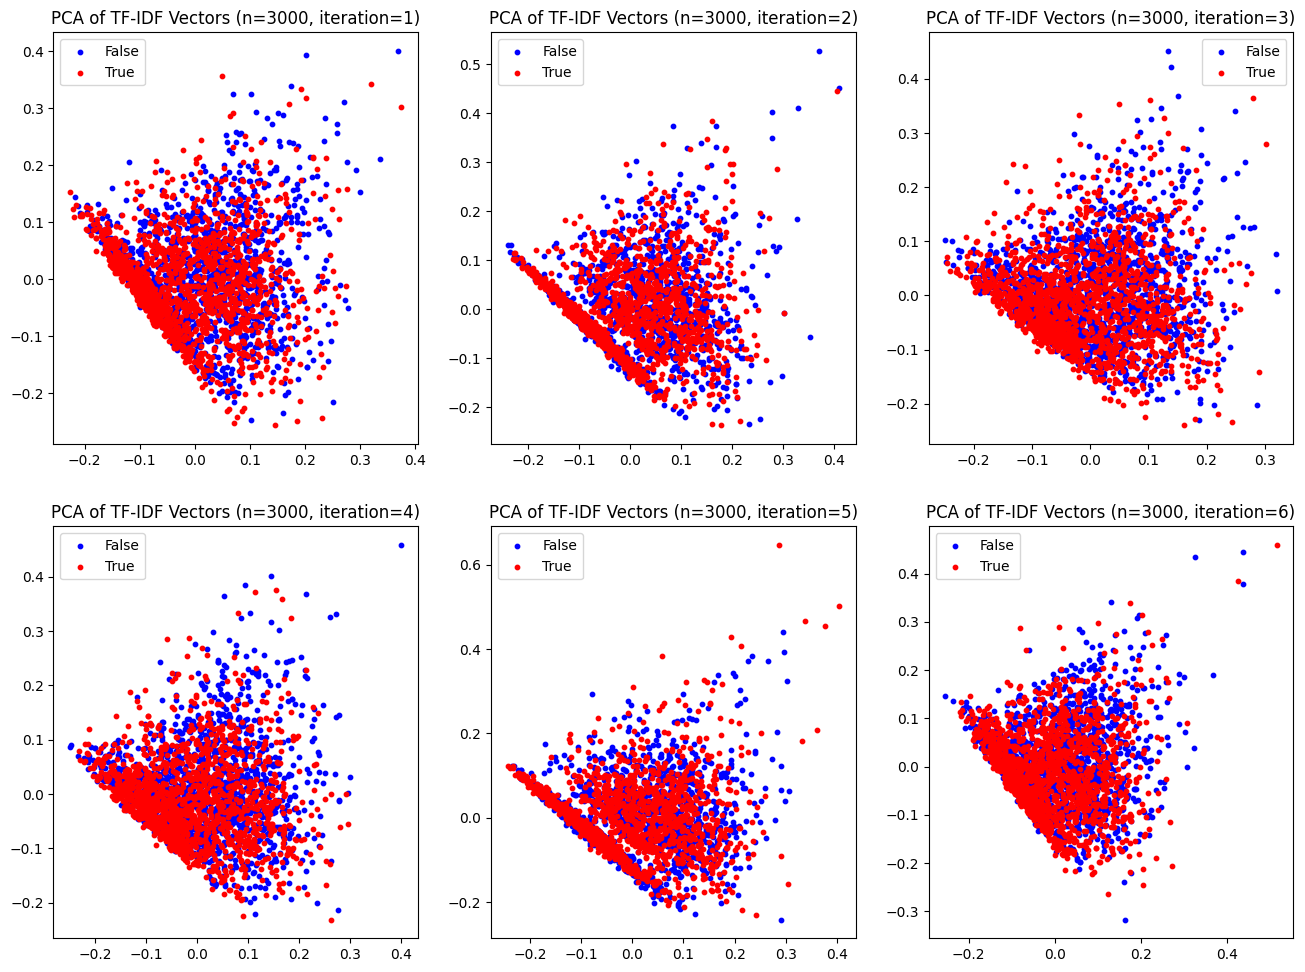

<Figure size 432x288 with 0 Axes>

In [8]:
figure = plt.figure(figsize=(16, 12), dpi=100)
for i in range(6):
    # subset of the larger dataset to perform principle component analysis on
    # (dataset is too large to process all at once)
    subset = dataset.sample(n=SAMPLE_SIZE, random_state=RANDOM_SEED + i)

    # split data and labels into x and y
    x = subset['text'].values
    y = subset['label'].values

    # generate embeddings for TF-IDF
    print(f'Iteration: {i + 1}')
    tfidf_embeddings = tfidf_vectorizer.fit_transform(x).toarray()
    print('TF-IDF matrix shape:', tfidf_embeddings.shape)

    # principle component analysis of the tf-idf matrix/embeddings (keep 2 components and plot)
    tfidf_pca = analyzer.fit_transform(tfidf_embeddings)
    print('PCA matrix shape:', tfidf_pca.shape)

    # plot data for this iteration
    figure.add_subplot(2, 3, i + 1)
    plt.scatter(tfidf_pca[y == 0, 0], tfidf_pca[y == 0, 1], color='b', s=10, label='False')
    plt.scatter(tfidf_pca[y == 1, 0], tfidf_pca[y == 1, 1], color='r', s=10, label='True')
    plt.title(f'PCA of TF-IDF Vectors (n={SAMPLE_SIZE}, iteration={i + 1})')
    plt.legend()

plt.show()

Iteration: 1
BOW matrix shape: (3000, 30729)
PCA matrix shape: (3000, 2)
Iteration: 2
BOW matrix shape: (3000, 31048)
PCA matrix shape: (3000, 2)
Iteration: 3
BOW matrix shape: (3000, 30646)
PCA matrix shape: (3000, 2)
Iteration: 4
BOW matrix shape: (3000, 30622)
PCA matrix shape: (3000, 2)
Iteration: 5
BOW matrix shape: (3000, 31098)
PCA matrix shape: (3000, 2)
Iteration: 6
BOW matrix shape: (3000, 30727)
PCA matrix shape: (3000, 2)


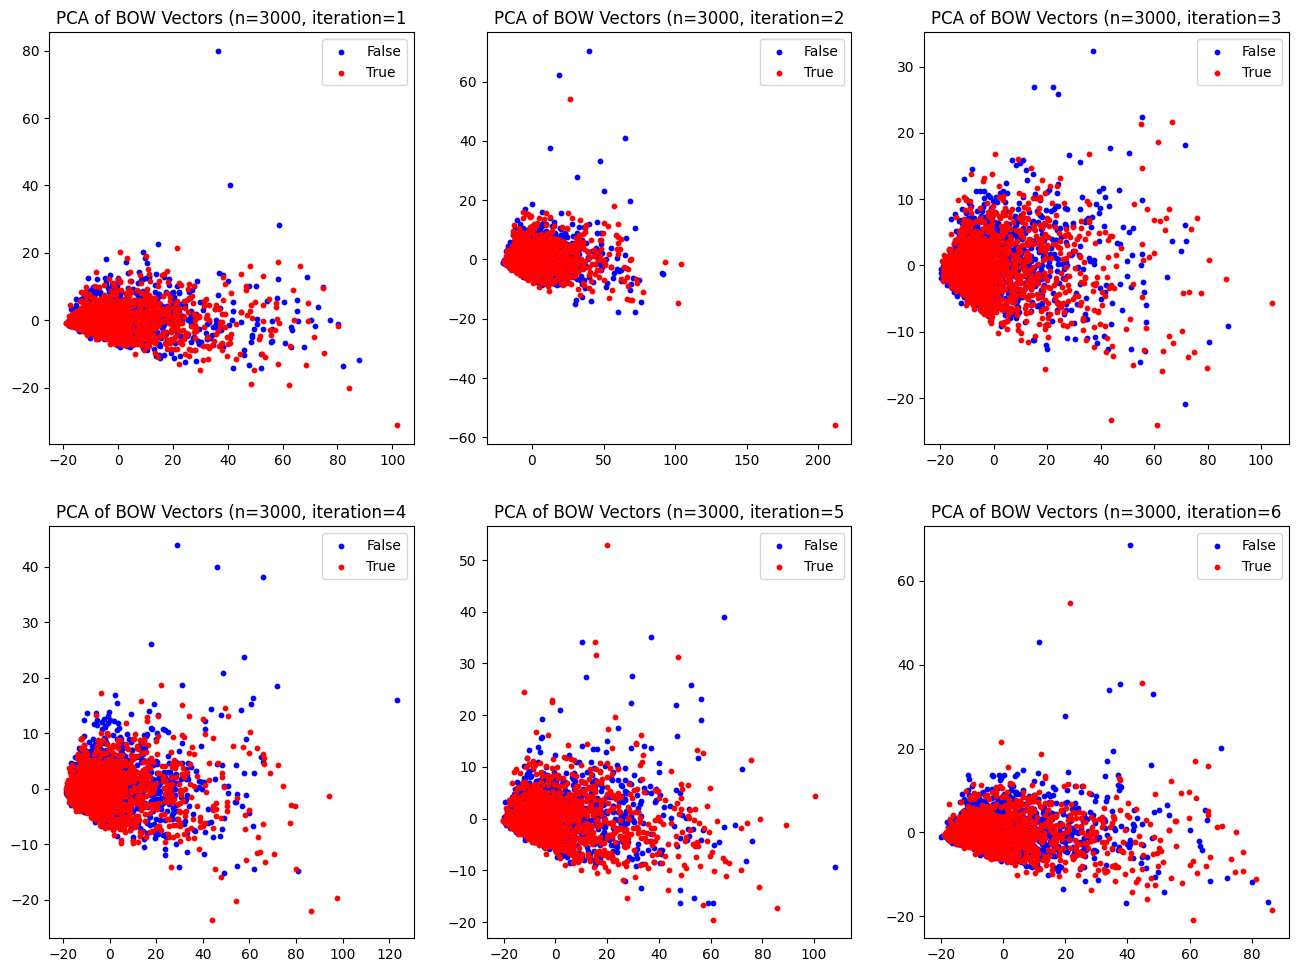

<Figure size 432x288 with 0 Axes>

In [9]:
bow_vectorizer = CountVectorizer()

figure = plt.figure(figsize=(16, 12), dpi=100)
for i in range(6):
    # subset of the larger dataset to perform principle component analysis on
    # (dataset is too large to process all at once)
    subset = dataset.sample(n=SAMPLE_SIZE, random_state=RANDOM_SEED + i)

    # split data and labels into x and y
    x = subset['text'].values
    y = subset['label'].values

    # generate embeddings for BOW
    print(f'Iteration: {i + 1}')
    bow_embeddings = bow_vectorizer.fit_transform(x).toarray()
    print('BOW matrix shape:', bow_embeddings.shape)

    # principle component analysis of the bow matrix/embeddings (keep 2 components and plot)
    bow_pca = analyzer.fit_transform(bow_embeddings)
    print('PCA matrix shape:', bow_pca.shape)

    # plot data for this iteration
    figure.add_subplot(2, 3, i + 1)
    plt.scatter(bow_pca[y == 0, 0], bow_pca[y == 0, 1], color='b', s=10, label='False')
    plt.scatter(bow_pca[y == 1, 0], bow_pca[y == 1, 1], color='r', s=10, label='True')
    plt.title(f'PCA of BOW Vectors (n={SAMPLE_SIZE}, iteration={i + 1}')
    plt.legend()

plt.show()


# Incremental PCA: Plot for TF-IDF and BoW vectorizer

In [10]:
tfidf_vectorizer = TfidfVectorizer()
analyzer = IncrementalPCA(n_components=COMPONENTS)

Iteration: 1
TF-IDF matrix shape: (3000, 30729)
Inc. PCA matrix shape: (3000, 2)
Iteration: 2
TF-IDF matrix shape: (3000, 31048)
Inc. PCA matrix shape: (3000, 2)
Iteration: 3
TF-IDF matrix shape: (3000, 30646)
Inc. PCA matrix shape: (3000, 2)
Iteration: 4
TF-IDF matrix shape: (3000, 30622)
Inc. PCA matrix shape: (3000, 2)
Iteration: 5
TF-IDF matrix shape: (3000, 31098)
Inc. PCA matrix shape: (3000, 2)
Iteration: 6
TF-IDF matrix shape: (3000, 30727)
Inc. PCA matrix shape: (3000, 2)


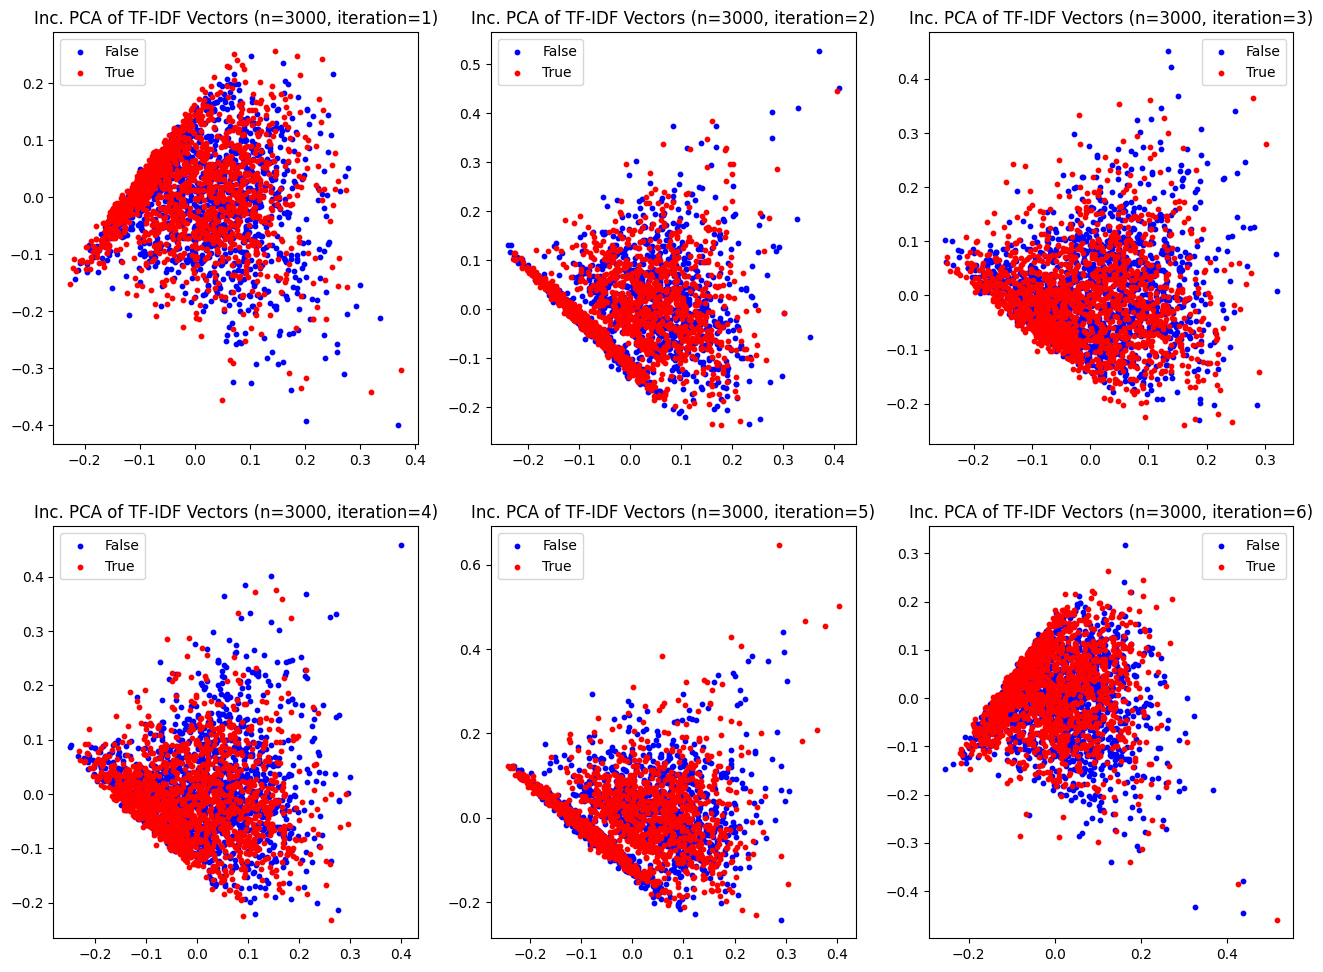

In [11]:
figure = plt.figure(figsize=(16, 12), dpi=100)
for i in range(6):
    # subset of the larger dataset to perform principle component analysis on
    # (dataset is too large to process all at once)
    subset = dataset.sample(n=SAMPLE_SIZE, random_state=RANDOM_SEED + i)

    # split data and labels into x and y
    x = subset['text'].values
    y = subset['label'].values

    # generate embeddings for TF-IDF
    print(f'Iteration: {i + 1}')
    tfidf_embeddings = tfidf_vectorizer.fit_transform(x).toarray()
    print('TF-IDF matrix shape:', tfidf_embeddings.shape)

    # principle component analysis of the tf-idf matrix/embeddings (keep 2 components and plot)
    tfidf_pca = analyzer.fit_transform(tfidf_embeddings)
    print('Inc. PCA matrix shape:', tfidf_pca.shape)

    # plot data for this iteration
    figure.add_subplot(2, 3, i + 1)
    plt.scatter(tfidf_pca[y == 0, 0], tfidf_pca[y == 0, 1], color='b', s=10, label='False')
    plt.scatter(tfidf_pca[y == 1, 0], tfidf_pca[y == 1, 1], color='r', s=10, label='True')
    plt.title(f'Inc. PCA of TF-IDF Vectors (n={SAMPLE_SIZE}, iteration={i + 1})')
    plt.legend()

plt.show()

Iteration: 1
BOW matrix shape: (3000, 30729)
Inc. PCA matrix shape: (3000, 2)
Iteration: 2
BOW matrix shape: (3000, 31048)
Inc. PCA matrix shape: (3000, 2)
Iteration: 3
BOW matrix shape: (3000, 30646)
Inc. PCA matrix shape: (3000, 2)
Iteration: 4
BOW matrix shape: (3000, 30622)
Inc. PCA matrix shape: (3000, 2)
Iteration: 5
BOW matrix shape: (3000, 31098)
Inc. PCA matrix shape: (3000, 2)
Iteration: 6
BOW matrix shape: (3000, 30727)
Inc. PCA matrix shape: (3000, 2)


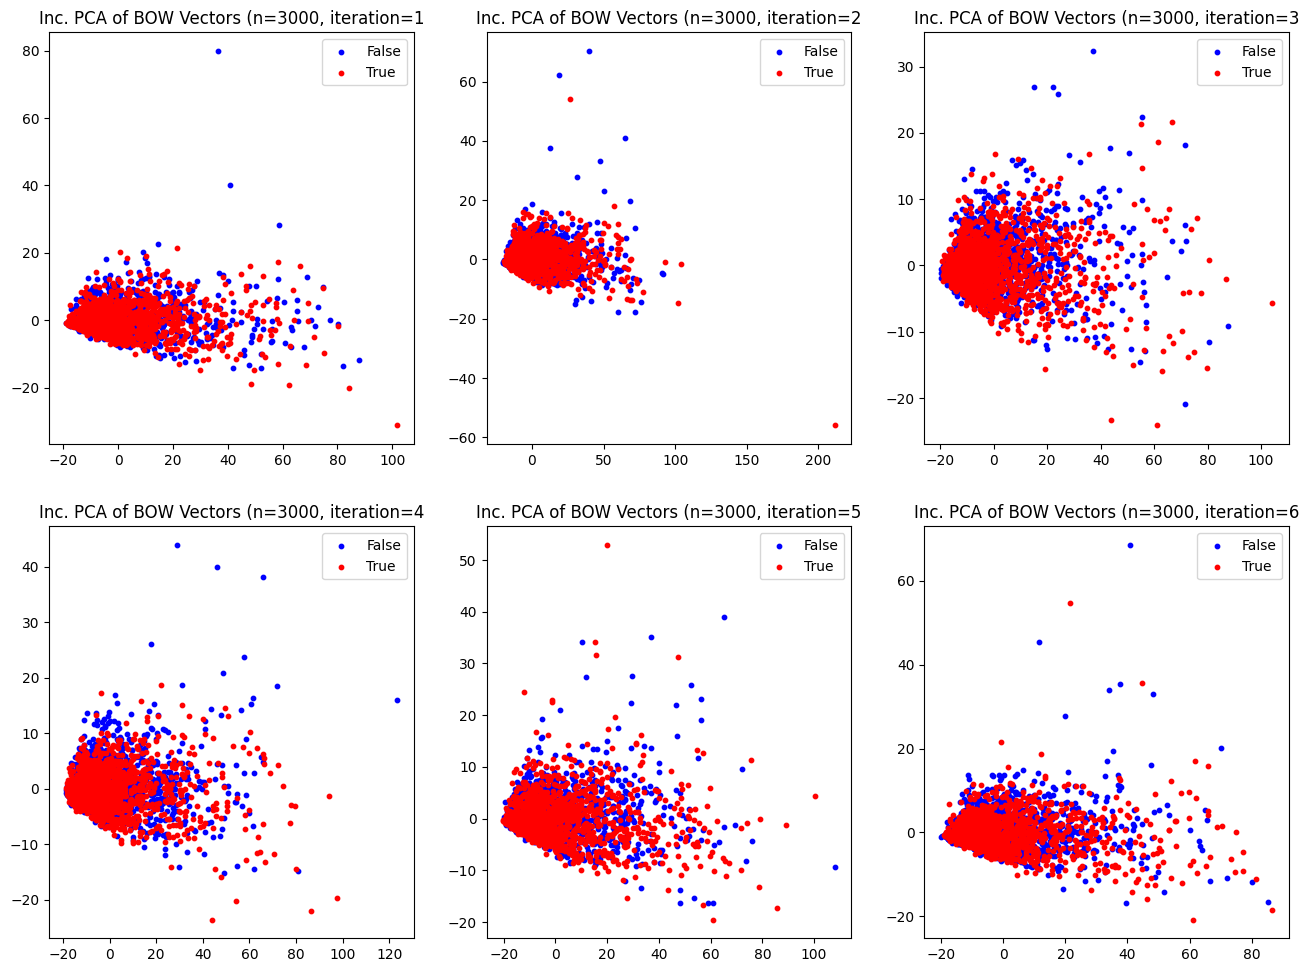

In [12]:
bow_vectorizer = CountVectorizer()

figure = plt.figure(figsize=(16, 12), dpi=100)
for i in range(6):
    # subset of the larger dataset to perform principle component analysis on
    # (dataset is too large to process all at once)
    subset = dataset.sample(n=SAMPLE_SIZE, random_state=RANDOM_SEED + i)

    # split data and labels into x and y
    x = subset['text'].values
    y = subset['label'].values

    # generate embeddings for BOW
    print(f'Iteration: {i + 1}')
    bow_embeddings = bow_vectorizer.fit_transform(x).toarray()
    print('BOW matrix shape:', bow_embeddings.shape)

    # principle component analysis of the bow matrix/embeddings (keep 2 components and plot)
    bow_pca = analyzer.fit_transform(bow_embeddings)
    print('Inc. PCA matrix shape:', bow_pca.shape)

    # plot data for this iteration
    figure.add_subplot(2, 3, i + 1)
    plt.scatter(bow_pca[y == 0, 0], bow_pca[y == 0, 1], color='b', s=10, label='False')
    plt.scatter(bow_pca[y == 1, 0], bow_pca[y == 1, 1], color='r', s=10, label='True')
    plt.title(f'Inc. PCA of BOW Vectors (n={SAMPLE_SIZE}, iteration={i + 1}')
    plt.legend()

plt.show()
